In [495]:
import matplotlib.pyplot as plt
import numpy as np
from palettable.cartocolors.qualitative import Prism_10 as colorscheme

plt.style.use('default')
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.size": 11,
        "font.family": "lmodern",
        "legend.fontsize": "x-small",
        "figure.figsize": (15, 5),
        "axes.labelsize": "x-small",
        "axes.titlesize": "x-small",
        "xtick.labelsize": "xx-small",
        "ytick.labelsize": "xx-small",
    }
)


In [155]:
from matplotlib.transforms import Bbox

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

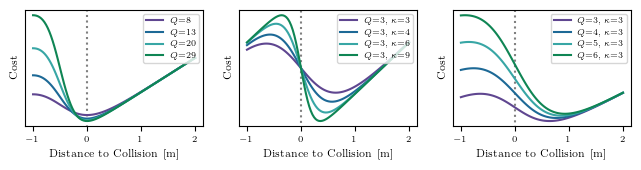

In [205]:
def my_cost_function(x, Q, r):
    x_min = np.log((np.sqrt(Q**2 - 4*Q) + Q) / 2 - 1)
    s = r / x_min
    cost = (s* Q) / (1 + np.exp((x+r)/s)) + (x+r)
    return cost

def other_cost_function(x, Q, k, r):
    cost = (Q) / (1 + np.exp(k*x)) + x
    return cost

x = np.linspace(-1, 2, 100)

fig, axs = plt.subplots(1, 3, figsize=[6.7, 1.7])
plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
for ax in axs:
    ax.set_prop_cycle('color', colorscheme.mpl_colors)

axs[0].plot(x, my_cost_function(x, 8, 0.5), label='$Q$=8')
axs[0].plot(x, my_cost_function(x, 8+5, 0.5), label='$Q$=13')
axs[0].plot(x, my_cost_function(x, 8+5+7, 0.5), label='$Q$=20')
axs[0].plot(x, my_cost_function(x, 8+5+7+9, 0.5), label='$Q$=29')

axs[1].plot(x, other_cost_function(x, 3, 3, 0.5), label='$Q$=3, $\kappa$=3')
axs[1].plot(x, other_cost_function(x, 3, 4, 0.5), label='$Q$=3, $\kappa$=4')
axs[1].plot(x, other_cost_function(x, 3, 6, 0.5), label='$Q$=3, $\kappa$=6')
axs[1].plot(x, other_cost_function(x, 3, 9, 0.5), label='$Q$=3, $\kappa$=9')

axs[2].plot(x, other_cost_function(x, 3, 3, 0.5), label='$Q$=3, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 4, 3, 0.5), label='$Q$=4, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 5, 3, 0.5), label='$Q$=5, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 6, 3, 0.5), label='$Q$=6, $\kappa$=3')

for ax in axs:
    ax.autoscale_view()
    ax.set_autoscale_on(False)
    ax.vlines(0, 0, 10, linestyle=':', color='grey', zorder=-10)

    ax.set_yticks([])

    ax.set_xlabel('Distance to Collision [m]')

    ax.legend(loc=1, prop={'size': 6})

    ax.set_ylabel('Cost')

# axs[0].set_title('My Cost Function')
# axs[1].set_title('Kamel et al. Cost Function (Q=3)')
# axs[2].set_title('Kamel et al. Cost Function (k=3)')

# Show the plot
plt.show()

for i, ax in enumerate(axs):
    extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.01
    extent.x1 += 0.01
    extent.y0 -= 0.01
    extent.y1 += 0.01
    fig.savefig(f'figures/nmpc_cost_function_{i}.pdf', bbox_inches=extent)


In [16]:
cost_function(x, 3, 1)

/var/folders/92/8k5fmrg912ddw3078_56nn2c0000gn/T/ipykernel_58406/2514431587.py:2: RuntimeWarning: invalid value encountered in sqrt
  x_min = np.log((np.sqrt(Q**2 - 4*Q) + Q) / 2 - 1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

# VO

In [591]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget

plt.style.use('default')
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.size": 11,
        "font.family": "lmodern",
        "legend.fontsize": "x-small",
        "figure.figsize": (15, 5),
        "axes.labelsize": "x-small",
        "axes.titlesize": "x-small",
        "xtick.labelsize": "xx-small",
        "ytick.labelsize": "xx-small",
    }
)
import seaborn as sns
color_palette = sns.color_palette('Set2', 10)
from palettable.cartocolors.qualitative import Prism_10 as colorscheme


In [576]:
colorscheme.colors[0]

[95, 70, 144]

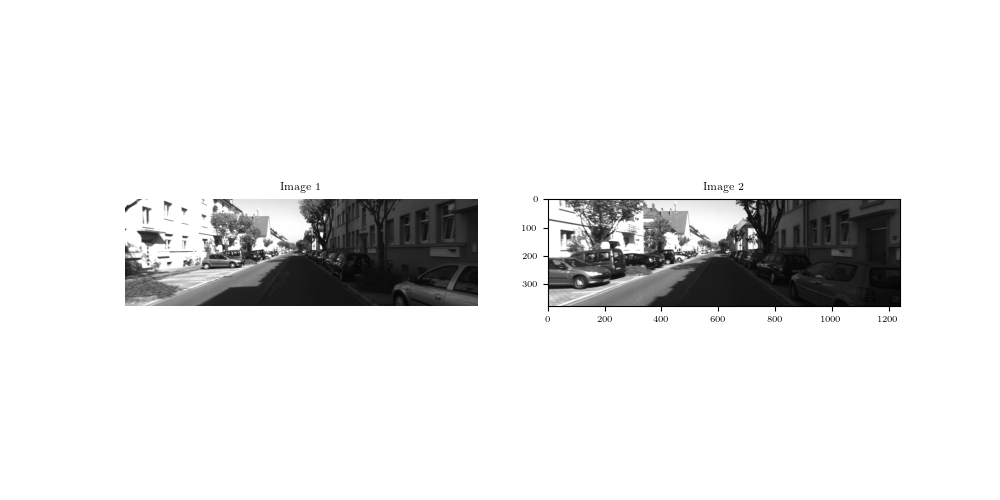

In [634]:
# Load images
img1 = cv2.cvtColor(cv2.imread('figures/vo_image_8.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('figures/vo_image_9.png'), cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img1), plt.title('Image 1')
plt.axis('off')
plt.subplot(122), plt.imshow(img2), plt.title('Image 2')
plt.show()
plt.axis('off')

img1 = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
img2 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [618]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)


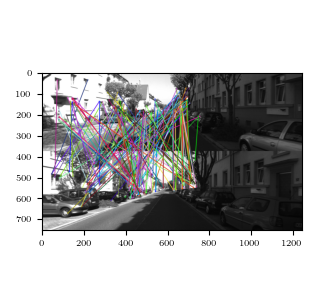

In [635]:
# Draw matches
draw_params = dict(matchesThickness = 2,
                   singlePointColor = None,
                   flags = 2)
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)
matched_img = cv2.rotate(matched_img, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(6.7/2, 3))
plt.imshow(matched_img)
plt.show()
plt.axis('off')


plt.savefig('figures/vo_matches.pdf', bbox_inches='tight', pad_inches=0, dpi=300)


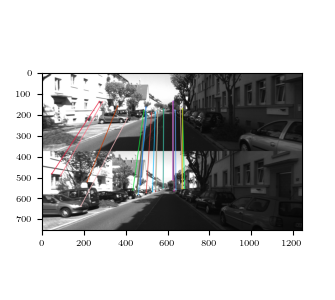

In [636]:
# Extract location of good matches
points1 = np.float32([kp1[m.queryIdx].pt for m in matches])
points2 = np.float32([kp2[m.trainIdx].pt for m in matches])

# Find homography
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Draw only inliers
matches_mask = mask.ravel().tolist()
draw_params = dict(matchesThickness = 2,
                   singlePointColor = None,
                   flags = 2)

good_match_inliers = [m for m, mask in zip(matches, matches_mask) if mask]

_, other_mask = cv2.findHomography(points1, points2, cv2.RANSAC,ransacReprojThreshold=10)
good_match_inliers_2 = [m for m, other_mask in zip(matches, other_mask.ravel().tolist()) if other_mask]
points1_inliers = np.float32([kp1[m.queryIdx].pt for m in good_match_inliers_2])
points2_inliers = np.float32([kp2[m.trainIdx].pt for m in good_match_inliers_2])

img_inliers = cv2.drawMatches(img1, kp1, img2, kp2, good_match_inliers_2, None, **draw_params)
img_inliers = cv2.rotate(img_inliers, cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize=(6.7/2, 3))
plt.imshow(img_inliers)
plt.show()
plt.axis('off')


plt.savefig('figures/vo_matches_ransac.pdf', bbox_inches='tight', pad_inches=0, dpi=300)


In [501]:
# Define camera intrinsic parameters
# K = np.array([994.33551079, 0, 637.96756211,
#               0, 993.37902712, 372.64854189,
#               0, 0, 1])

K = np.array([718.856, 0, 607.1928,
              0, 718.856, 185.2157,
              0, 0, 1])


In [469]:
# Decompose the homography matrix
_, Rs, Ts, Ns = cv2.decomposeHomographyMat(H, K)


In [475]:
# Choose the first solution of R and T (you might need to change this based on the scene)
R = Rs[0]
T = Ts[1]


In [476]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [477]:
P_1 = np.eye(3, 4)
P_1[0, 0] = K[0]
P_1[1, 1] = K[4]
P_1[0, 2] = K[2]
P_1[1, 2] = K[5]

# Compute the Projection Matrix P = K * [R | T] (3x4)
RT = np.hstack((R, T.reshape(-1, 1)))
P_2 = K.reshape(3,3) @ RT

In [478]:
#d = np.array([0.19032289,-0.47365167,0.00276779,-0.00073248,0.32804567])
# d = np.array([0.,-0.,0.,-0.])
# points1u = cv2.undistortPoints(points1_inliers.reshape(-1, 1, 2), cameraMatrix=K.reshape(3,3), distCoeffs=d)
# points2u = cv2.undistortPoints(points2_inliers.reshape(-1, 1, 2), cameraMatrix=K.reshape(3,3), distCoeffs=d)

points4D = cv2.triangulatePoints(P_1, P_2, points1_inliers.reshape(-1, 1, 2), points2_inliers.reshape(-1, 1, 2))
points3D = points4D[:3, :] / points4D[3, :]

/var/folders/92/8k5fmrg912ddw3078_56nn2c0000gn/T/ipykernel_31963/1916287484.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points3D[2], points3D[0], c=color_palette[2], s=10, alpha=1, label='Triangulated\nPoints')


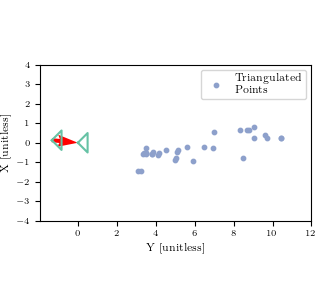

In [649]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize 3D plot
fig = plt.figure(figsize=(6.7/2, 3))
ax = fig.add_subplot(111)
plt.tight_layout()

# Origin
axis_length = 0.5
# ax.quiver(0, 0, 0, axis_length, 0, 0, color='red', arrow_length_ratio=0.1)
# # Y-axis in green
# ax.quiver(0, 0, 0, 0, axis_length, 0, color='green', arrow_length_ratio=0.1)
# # Z-axis in blue
# ax.quiver(0, 0, 0, 0, 0, axis_length, color='blue', arrow_length_ratio=0.1)
ax.plot([0, axis_length, axis_length, 0], [0, axis_length, -axis_length, 0], color=color_palette[0])

# Translation vector
ax.quiver(T[2], T[0], -T[2], -T[0], scale=1, scale_units="xy", color="red", width=0.015)

# Original axes vectors
# axes_vectors = np.array([
#     [axis_length, 0, 0],  # X-axis (Red)
#     [0, axis_length, 0],  # Y-axis (Green)
#     [0, 0, axis_length]   # Z-axis (Blue)
# ])
# # Apply rotation and translation
# transformed_axes = np.dot(axes_vectors, R.T)
# # Draw axes lines
# for i, color in zip(range(3), ['red', 'green', 'blue']):
#     ax.quiver(*T, *transformed_axes[i], color=color, arrow_length_ratio=0.1)

ax.plot([0, axis_length, axis_length, 0] + T[2], [0, axis_length, -axis_length, 0] + T[0], color=color_palette[0])
    
# Plot triangulated points
ax.scatter(points3D[2], points3D[0], c=color_palette[2], s=10, alpha=1, label='Triangulated\nPoints')


# Setting plot limits
# ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
# ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_ylim(-4, 4)
ax.set_xlim(None, 12)
ax.legend()
ax.set_xlabel('Y [unitless]')
ax.set_ylabel('X [unitless]')

# Title and show
plt.show()

plt.savefig('figures/3d_reconstruction.pdf', bbox_inches='tight')


/var/folders/92/8k5fmrg912ddw3078_56nn2c0000gn/T/ipykernel_31963/2831401129.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(points3D[2], points3D[1], c=color_palette[2], s=10, alpha=1, label='Triangulated\nFeatures')


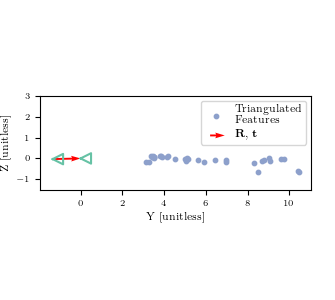

In [710]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize 3D plot
fig = plt.figure(figsize=(6.7/2, 3))
ax = fig.add_subplot(111)
plt.tight_layout()

# Origin
axis_length = 0.5
# ax.quiver(0, 0, 0, axis_length, 0, 0, color='red', arrow_length_ratio=0.1)
# # Y-axis in green
# ax.quiver(0, 0, 0, 0, axis_length, 0, color='green', arrow_length_ratio=0.1)
# # Z-axis in blue
# ax.quiver(0, 0, 0, 0, 0, axis_length, color='blue', arrow_length_ratio=0.1)
ax.plot([0, axis_length, axis_length, 0], [0, axis_length/2, -axis_length/2, 0], color=color_palette[0])

# Translation vector
quiver = ax.quiver(T[2], T[1], -T[2], -T[1], scale=1, scale_units="xy", color="red", width=0.007)

# Original axes vectors
# axes_vectors = np.array([
#     [axis_length, 0, 0],  # X-axis (Red)
#     [0, axis_length, 0],  # Y-axis (Green)
#     [0, 0, axis_length]   # Z-axis (Blue)
# ])
# # Apply rotation and translation
# transformed_axes = np.dot(axes_vectors, R.T)
# # Draw axes lines
# for i, color in zip(range(3), ['red', 'green', 'blue']):
#     ax.quiver(*T, *transformed_axes[i], color=color, arrow_length_ratio=0.1)

ax.plot([0, axis_length, axis_length, 0] + T[2], [0, axis_length/2, -axis_length/2, 0] + T[1], color=color_palette[0])
    
# Plot triangulated points
points = ax.scatter(points3D[2], points3D[1], c=color_palette[2], s=10, alpha=1, label='Triangulated\nFeatures')

empty_handle = ax.scatter([0], [0], label=' ', s=0)

# Setting plot limits
# ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
# ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_ylim(-1.5, 3)
ax.legend(handles=[points, empty_handle]).set_zorder(-1)
ax.set_xlabel('Y [unitless]')
ax.set_ylabel('Z [unitless]')
plt.quiverkey(quiver, 6.9, 1.1, 0.7, '$\mathbf{R}$, $\mathbf{t}$', coordinates='data', labelpos="E", fontproperties={"size": "x-small"})

# Title and show
plt.show()

plt.savefig('figures/3d_reconstruction.pdf', bbox_inches='tight')


# BoW

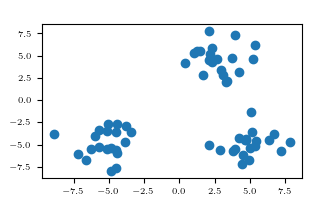

In [731]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random data around a centroid
def generate_cluster(center, num_points, spread):
    """ Generate random data around a center point.
    
    Args:
    center (array-like): The center of the cluster.
    num_points (int): Number of points in the cluster.
    spread (float): How spread out the cluster is.
    
    Returns:
    array: Numpy array of shape (num_points, len(center)).
    """
    return np.random.randn(num_points, len(center)) * spread + center

# Set random seed for reproducibility
np.random.seed(42)

# Define centers of clusters in 2D
centers = [
    [3, 5],
    [-5, -5],
    [5, -5]
]

# Number of points per cluster
num_points = 20

# Spread of each cluster
spread = 1.5

# Generate data for each cluster
points = np.vstack([generate_cluster(center, num_points, spread) for center in centers])

# Creating the plot
plt.figure(figsize=(6.7/2, 2))

# Plotting data
plt.scatter(points[:, 0], points[:, 1])


# Show plot
plt.show()


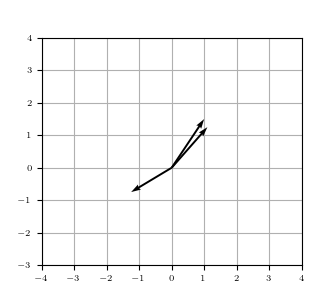

In [750]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vectors
vectors = np.array([[2/2, 3/2], [2.2/2, 2.5/2], [-2.5/2, -1.5/2]])

# Create a new figure and an axes object
fig, ax = plt.subplots(figsize=(6.7/2, 3))

# Plot each vector
for v in vectors:
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black')

# Setting the aspect of the plot to be equal, to maintain the scale of the vectors
ax.set_aspect('equal')

# Hide all ticks and labels
# ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])

# Set limits for the axes
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 4)

# Add grid
#make grid behind the data
ax.set_axisbelow(True)
ax.grid(True)

# Show the plot
plt.show()
